---

**Las imágenes** a utilizar en este cuaderno son:

- opencv.png
- numeros.png
- digitos2.png
- figura.tif
- cuadraditos.bmp
- arroz.png
- matricula.png
- sudoku9.jpg


---

**Montamos el Drive** de nuestro repositorio de Google para tener acceso a las imágenes que empleamos en este cuaderno:

---


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

---

**Importamos las librerias** que vamos a emplear en este cuaderno:

---


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

---
# Morfología Matemática

La Morfología Matemática es un área del procesamiento de imágenes que se basa en conceptos matemáticos de la teoría de conjuntos para estudiar y describir las formas, estructuras y patrones presentes en imágenes digitales.

Tipos de Morfología Matemática:

- Morfología Binaria: Transformaciones de Conjuntos (Imágenes binarias)
- Morfología Numérica: Transformaciones de Funciones (Imágenes Numéricas)

La Morfología Matemática nos permite construir transformaciones complejas mediante iteración o concatenación de transformaciones elementales.

---


## Operaciones básicas entre conjuntos

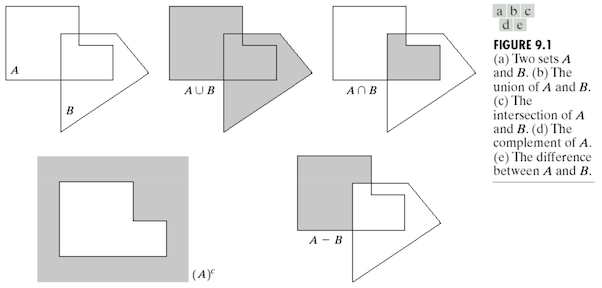

**Nota**: Estas operaciones básicas en imágenes binarias se corresponden con los operadores bitwise que ya hemos visto en el cuaderno sobre el procesamiento del color.

---


## Elementos Estructurantes

En Morfología Matemática trabajamos con:

- Imágenes: conjuntos de píxeles de tamaño apreciable
- Elementos Estructurantes: conjuntos de píxeles de tamaño reducido:

  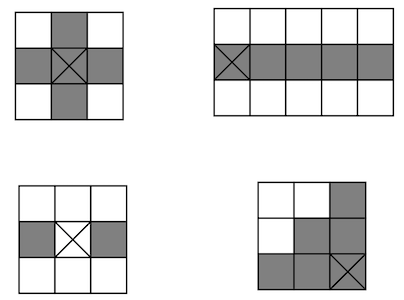


---

En OpenCV podemos construir 3 tipos de Elementos estructurantes con la función **getStructuringElement** (rectángulo, cruz y elipse):

- MORPH_RECT
- MORPH_CROSS
- MORPH_ELLIPSE

**Nota**: también podemos construirnos cualquier elemento estructurante indicando explícitamente el contenido de su matriz.

---


In [ ]:
tamanio = (3, 3)
ee = cv2.getStructuringElement(cv2.MORPH_RECT, tamanio)
print(f'Elemento Estructurante rectángular de tamaño {tamanio}:\n {ee}\n')

tamanio = (3, 7)
ee = cv2.getStructuringElement(cv2.MORPH_CROSS, tamanio)
print(f'Elemento Estructurante en forma de cruz de tamaño {tamanio}:\n {ee}\n')

tamanio = (5, 5)
ee = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, tamanio)
print(f'Elemento Estructurante elíptico de tamaño {tamanio}:\n {ee}')

# mostramos todos los flags relacionados con Morfología en OpenCV
flags = [i for i in dir(cv2) if i.startswith('MORPH_')]
print(flags)

---

## Operadores básicos de erosión y dilatación

---

### Ejemplo 1: Erosión de una imagen binaria

  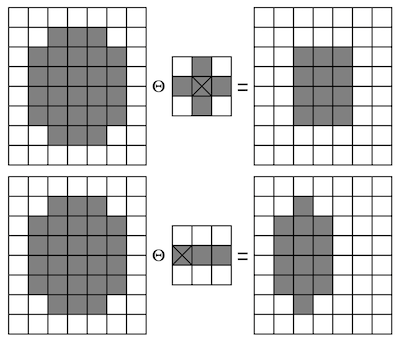

  ---
  

In [ ]:
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'opencv.png'
path += nombre_imagen

# Abrimos y mostramos la imagen original
imgGris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print('Imagen Original')
cv2_imshow(imgGris)

# Creamos el elemento estructurante
ee = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

# Tres formas de ejecutar la erosión en OpenCV
imgEro1 = cv2.erode(imgGris, ee)
imgEro2 = cv2.morphologyEx(imgGris, cv2.MORPH_ERODE, ee)
ee = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
imgEro3 = cv2.erode(imgGris, ee, iterations = 3)

print('Imagen Erosionada 1:')
cv2_imshow(imgEro1)
print('Imagen Erosionada 2:')
cv2_imshow(imgEro2)
print('Imagen Erosionada 3:')
cv2_imshow(imgEro3)


---

### Ejemplo 2: Dilatación de una imagen binaria

  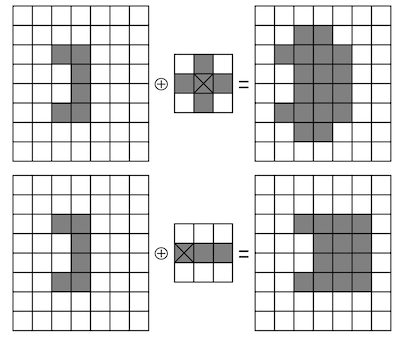

  ---
  

In [ ]:
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'opencv.png'
path += nombre_imagen

# Abrimos y mostramos la imagen original
imgGris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print('Imagen Original')
cv2_imshow(imgGris)

# Creamos el elemento estructurante
ee = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

# Tres formas de ejecutar la erosión en OpenCV
imgDil1 = cv2.dilate(imgGris, ee)
imgDil2 = cv2.morphologyEx(imgGris, cv2.MORPH_DILATE, ee)
ee = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
imgDil3 = cv2.dilate(imgGris, ee, iterations = 3)

print('Imagen Dilatada 1:')
cv2_imshow(imgDil1)
print('Imagen Dilatada 2:')
cv2_imshow(imgDil2)
print('Imagen Dilatada 3:')
cv2_imshow(imgDil3)


---

### Ejemplo 3: Erosión y dilatación en imágenes numéricas monocromáticas

**Nota**: las operaciones morfológicas se entienden que se ejecutan sobre imágenes con formas claras sobre fondo orcuro (una erosión en una imagen con formas oscuras sobre fondo claro es lo mismo que el complemento de una dilatación en una imagen con formas claras sobre fondo oscuro).

---


In [ ]:
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'numeros.png'
path += nombre_imagen

# Abrimos y mostramos la imagen original
imgGris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print('Imagen Original:')
cv2_imshow(imgGris)

# Obtenemos y mostramos el complemento de la imagen original
imgGrisNeg = 255 - imgGris
print('Complemento de la Imagen Original (negativo):')
cv2_imshow(imgGrisNeg)

# Creamos el elemento estructurante
ee = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Erosionamos la imagen original
imgEro = cv2.erode(imgGris, ee, iterations = 3)
print('Imagen Original Erosionada:')
cv2_imshow(imgEro)

# Dilatamos la imagen en negativo
imgDil = cv2.dilate(imgGrisNeg, ee, iterations = 3)
print('Complemento de la Imagen Original Dilatado:')
cv2_imshow(imgDil)

# Volvemos a invertir para comparar resultados
imgDilNeg = 255 - imgDil
print('Imagen Dilatada en negativo:')
cv2_imshow(imgDilNeg)


---

## Operadores básicos de apertura y cierre

- La **apertura** es una operación de erosión seguida de una operación de dilatación con el mismo elemento estructurante
- El **cierre** es una operación de dilatación seguida de una operación de erosión con el mismo elemento estructurante

---

### Ejemplo 4: Apertura de una imagen

---


In [ ]:
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'digitos2.png'
path += nombre_imagen

# Abrimos y mostramos la imagen original
imgGris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print('Imagen Original')
cv2_imshow(imgGris)

# Creamos el elemento estructurante
ee = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Operación de apertura en OpenCV
imgApe = cv2.morphologyEx(imgGris, cv2.MORPH_OPEN, ee)
print('Apertura de la imagen original:')
cv2_imshow(imgApe)

# Es lo mismo que una erosión seguida de una dilatación
imgEro = cv2.erode(imgGris, ee)
imgDil = cv2.dilate(imgEro, ee)
print('Erosión + Dilatación de la imagen original:')
cv2_imshow(imgDil)


---

### Ejemplo 5: Cierre de una imagen

---


In [ ]:
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'digitos2.png'
path += nombre_imagen

# Abrimos y mostramos la imagen original
imgGris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print('Imagen Original')
cv2_imshow(imgGris)

# Creamos el elemento estructurante
ee = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Operación de apertura en OpenCV
imgCierre = cv2.morphologyEx(imgGris, cv2.MORPH_CLOSE, ee)
print('Cierre de la imagen original:')
cv2_imshow(imgCierre)

# Es lo mismo que una dilatación seguida de una erosión
imgDil = cv2.dilate(imgGris, ee)
imgEro = cv2.erode(imgDil, ee)
print('Dilatación + Erosión de la imagen original:')
cv2_imshow(imgEro)


---

### Ejemplo 6: Filtrado Morfológico

  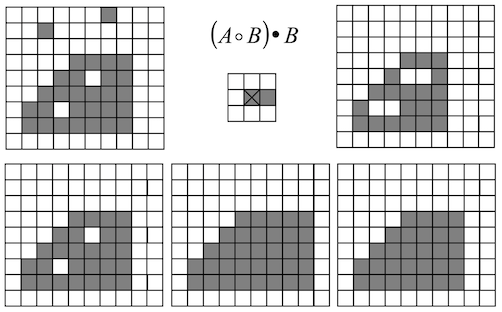

  ---
  

In [ ]:
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'numeros.png'
path += nombre_imagen

# Abrimos y mostramos la imagen original
imgGris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print('Imagen Original')
cv2_imshow(imgGris)

# Creamos el elemento estructurante
ee = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Filtado Morfológico = Apertura + Cierre
imgApertura = cv2.morphologyEx(imgGris, cv2.MORPH_OPEN, ee)
imgFiltrada = cv2.morphologyEx(imgApertura, cv2.MORPH_OPEN, ee)
print('Filtro Morfológico de la imagen original:')
cv2_imshow(imgFiltrada)


---

### Ejemplo 7: Gradientes Morfológicos:

- Gradiente Interno: Imagen Original - Imagen Erosionada
- Gradiente Externo: Imagen Dilatada - Imagen Original
- Gradiente Morfológico: Imagen Dilatada - Imagen Erosionada

---


In [ ]:
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'figura.tif'
path += nombre_imagen

# Abrimos y mostramos la imagen original
imgGris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print('Imagen Original')
cv2_imshow(imgGris)

# Creamos el elemento estructurante
ee = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Calculamos Erosión y Dilatación de la imagen original
imgEro = cv2.erode(imgGris, ee)
imgDil = cv2.dilate(imgGris, ee)

# Calculamos y mostramos los distintos gradientes
imgGradInterno = imgGris - imgEro
print('Gradiente Interno:')
cv2_imshow(imgGradInterno)

imgGradExterno = imgDil - imgGris
print('Gradiente Externo:')
cv2_imshow(imgGradExterno)

imgGradMorfo = imgDil - imgEro
print('Gradiente Morfológico:')
cv2_imshow(imgGradMorfo)


---

### Ejemplo 8: Adelgazamiento Morfológico

Esta operación consiste en ir erosionando la imagen hasta que esta se quede vacía (la imagen adelgazada será aquella justo anterior a que se hayan eliminado todos los píxeles debido a la erosión).

---


In [ ]:
# Creamos una imagen con texto en su interior
img = np.zeros((100,750), dtype='uint8')
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'ANALISIS DE IMAGENES', (25,70), font, 2,(255),5,cv2.LINE_AA)

# Hacemos una copia de la imagen para almacenar resultados intermedios
imgCopia = img.copy()

# Creamos un elemento estructurante
ee = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Creamos una imagen vacía para almacenar los resultados del adelgazamiento
imgAdelgazada = np.zeros(img.shape, dtype='uint8')

# Bucle hasta que la imagen erosionada es vacía
while (cv2.countNonZero(imgCopia) != 0):
    # Erosión
    imgEro = cv2.erode(imgCopia, ee)
    # Apertura de la imagen erosionada
    imgApe = cv2.morphologyEx(imgEro, cv2.MORPH_OPEN, ee)
    # Restamos las dos imágenes
    imgSubconjunto = imgEro - imgApe
    # Unión con los subconjuntos previos
    imgAdelgazada = cv2.bitwise_or(imgSubconjunto,imgAdelgazada)
    # Asignamos la imagen erosionada a la copia para la próxima iteración
    imgCopia = imgEro.copy()

print('Imagen Original')
cv2_imshow(img)

print('Imagen Adelgazada')
cv2_imshow(imgAdelgazada)


---

### Ejemplo 9: Emplear la erosión para determinar tamaños

  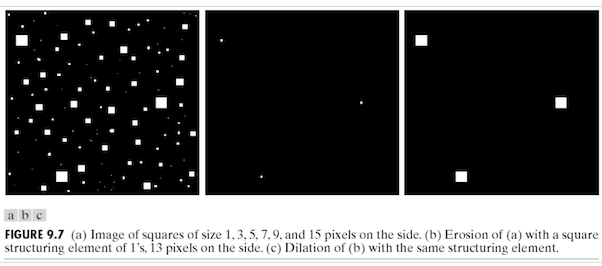

  ---
  

In [ ]:
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'cuadraditos.bmp'
path += nombre_imagen

# Abrimos y mostramos la imagen original
imgGris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print('Imagen Original')
cv2_imshow(imgGris)

# Creamos el elemento estructurante
ee = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 13))

# Calculamos Erosión de la imagen original por un EE de 13x13
imgEro = cv2.erode(imgGris, ee)
print('Imagen Erosionada')
cv2_imshow(imgEro)

# Volvemos a dilatar la imagen erosionada previamente con el mismo EE
imgDil = cv2.dilate(imgEro, ee)
print('Imagen Dilatada')
cv2_imshow(imgDil)

# Contamos los cuadrados de tamaño 15x15 que hay en la imagen
contornos, _ = cv2.findContours(imgDil, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(f'En la imagen hay {len(contornos)} cuadrados de tamaño 15x15')

# Quitamos los cuadrados de 15x15
imgGris = imgGris - imgDil
print('Imagen sin los cuadrados más grandes')
cv2_imshow(imgGris)


---

## EJERCICIO 1: Contar todos los cuadrados de distinto tamaño que hay en la imagen 'cuadraditos.bmp'

---


---

## Transformadas White Top-Hat y Black Top-Hat

    White top-hat transform: This is the difference between the image and its opening (MORPH_TOPHAT en OpenCV).
    Black top-hat transform: Difference between the closing and the input image (MORPH_BLACKHAT en OpenCV).

- El operador MORPH_TOPHAT resalta zonas claras sobre fondos oscuros
- El operador MORPH_BLACKHAT resalta zonas oscuras sobre fondos claros

**Nota**: también se puede utilizarse para abordar la iluminación no uniforme en imágenes y, por lo tanto, puede ser una herramienta de preprocesamiento útil para tareas de segmentación de imágenes. La idea principal consiste en seleccionar el elemento estructurante lo suficientemente grande como para erosionar toda la región del objeto. Entonces lo único que quedará será el fondo o el patrón de sombreado. Restar este fondo de la imagen (o transformación de sombrero de copa) producirá una imagen que reduce el efecto de iluminación no uniforme. De este modo, la imagen ahora podrá segmentarse mejor.


---

### Ejemplo 10: Transformada Top-Hat para iluminación no uniforme y contar objetos

- Abrimos una imagen con una iluminación no uniforme y aplicamos la transformación de sombrero de copa blanco a esa imagen
- Umbralizamos la imagen utilizando el método de Otsu (adecuado para imágenes bimodales ya que busca el umbral en función de la minimización de las varianzas considerando que sólo existen dos clústers)
- Contamos los objetos presentes en la imagen viendo cuántos contornos puede localizar

---


In [ ]:
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'arroz.png'
path += nombre_imagen

# Abrimos y mostramos la imagen original
imgGris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print('Imagen Original')
cv2_imshow(imgGris)

# Creamos el elemento estructurante
ee = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))

# Operación Top-Hat
blackhat = cv2.morphologyEx(imgGris, cv2.MORPH_TOPHAT, ee)
print('Imagen Resultado')
cv2_imshow(blackhat)

# Umbralización
_, binaria = cv2.threshold(blackhat, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Imagen Binaria')
cv2_imshow(binaria)

# Erosionamos la imagen binaria para separar aquellos que se tocan
imgEro = cv2.erode(binaria, None, iterations = 1)
print('Imagen Erosionada:')
cv2_imshow(imgEro)

# Contamos los granos de arroz
contornos, _ = cv2.findContours(imgEro, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(f'En la imagen hay {len(contornos)} granos de arroz')


---

### Ejemplo 11: Transformada Black-Hat para resaltar matrículas

La transformada BlackHat resalta zonas oscuras sobre fondo blanco (*una matrícula de coche español es así*)

---

In [ ]:
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'matricula.png'
path += nombre_imagen

imgBGR = cv2.imread(path, cv2.IMREAD_COLOR)
imgGris = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)
print('Imagen Original')
cv2_imshow(imgBGR)

# Construimos un elemento estructurante de 13x5 y aplicamps el
# black-hat para resaltar regiones oscuras sobre fondos claros
ee = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 15))
blackhat = cv2.morphologyEx(imgGris, cv2.MORPH_BLACKHAT, ee)

# Mostramos el resultado
print('Imagen Resultado')
cv2_imshow(blackhat)


---

## EJERCICIO 2: Aplicar Transformada para homogenizar la iluminación

- Abrir la imagen sudoku.jpg y aplicar una de las transformaciónes (top-hat o black-hat) para homogeneizar su iluminación
- Aplicar los procesos requiridos para obtener los contornos de la imagen y comprobar si el funcionamiento es mejor que sin utilizar una transformación de sombrero de copa para homogeneizar la iluminación

---

---

## EJERCICIO 3: Eliminar líneas de un sudoku

- Abrir la imagen sudoku9.jpg y eliminar las líneas horizontales y verticales

**Nota**: podemos definir nuestros propios elementos estructurates. Por ejemplo, para eliminar las líneas horizontales podríamos emplear:

---


In [ ]:
ee_h = np.array([[0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0]], np.uint8)

---

## Transformada Hit-Miss (todo o nada)

La transformación Hit-Miss es útil para encontrar patrones en imágenes binarias. En particular, encuentra aquellos píxeles cuya vecindad coincide con la forma de un primer elemento estructurante B1 mientras que al mismo tiempo no coincide con la forma de un segundo elemento estructurante B2. Matemáticamente, la operación aplicada a una imagen A se puede expresar de la siguiente manera:

  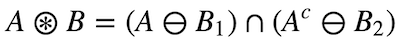

Por lo tanto, esta transfromación consta de tres pasos:

    1. Erosionar la imagen A con el elemento estructurante B1
    2. Erosionar el complemento de la imagen A con el elemento estructurante B2.
    3. Aplicar el operados AND sobre los resultados del paso 1 y del paso 2.

Los elementos estructurantes B1 y B2 se pueden combinar en un único elemento B. Por ejemplo:

  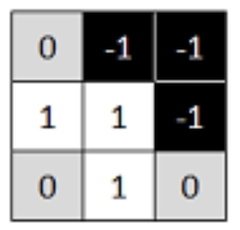

---


### Ejemplo 12: Transformada Hit-Miss para encontrar un tipo de esquinas

En este caso esquinas inferiores derechas:

  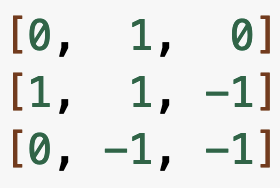

  ---
  

In [ ]:
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'figura.tif'
path += nombre_imagen

# Abrimos y mostramos la imagen original
imgGris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print('Imagen Original')
cv2_imshow(imgGris)

# Creamos el elemento estructurante
ee = np.array(( [0,  1,  0],
                [1,  1, -1],
                [0, -1, -1]), dtype = "int")

# Calculamos la transformada Hit-Miss para el EE elegido
res = cv2.morphologyEx(imgGris, cv2.MORPH_HITMISS, ee)

# Dilatamos la imagen para resaltar los esquinas encontradas
imgDil = cv2.dilate(res, None, iterations = 3)
print('Esquinas inferiores derechas:')
cv2_imshow(imgDil)


---

## EJERCICIO 4: Aplicar Transformada Hit-Miss para localizar elementos de una imagen

- Abrir la imagen 'figura.tif' y ver cómo definir distintos elementos estructurantes para localizar otros tipo de características además de las esquinas inferiores derechas

---

---

## EJERCICIO 5: Implementar la transformada Hit-Miss

- Implementar una función en Python que, dada una imagen binaria y dos elementos estructurantes B1 y B2, nos devuelva el resustado de realizar una transformación Hit-Miss realizando los 3 pasos indicados en este cuaderno

---
